### 1880--2010年间全美婴儿姓名

美国社会保障总署（SSA）提供了一份从1880年到2010年的婴儿名字频率数据，可以用这个数据集做很多事，例如：
* 计算指定名字的年度比例
* 计算某个名字的相对排名
* 计算各年度最流行的名字，以及增长或减少最快的名字
* 分子名字趋势：元音、辅音、长度、总体多样性、拼写变化、首尾字母等
* 分析外源性趋势：圣经中的名字、名人、人口结构变化等

***
由于这份文件是标准的以逗号分割的格式，所以可以用csv的方法将其加载到DataFrame中

In [1]:
import pandas as pd

names1880 = pd.read_csv('ch02/names/yob1880.txt',names=['name','sex','births'])
#用births列的sex分组小计表示该年度的births总计
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

***
由于该数据集按年度被分割成了多个文件，要将所有数据都组装到一个DataFrame里面，并加上一个year字段，使用pandas.concat即可达到这个目的：

In [2]:
#2010是目前最后一个有效统计年度
years = range(1880,2011)

pieces = []
columns = ['name','sex','births']

for year in years:
    path = 'ch02/names/yob%d.txt' %year
    frame = pd.read_csv(path,names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
#将所有数据集合到单个DataFrame中
names = pd.concat(pieces,ignore_index=True)
#ignore_index=True 不保留连接轴上的索引，产生一组新索引

***
有了这些数据之后，就可以利用groupby或pivot_table在year和sex级别上对其进行聚合了

In [3]:
total_births = names.pivot_table('births',index='year',
                                 columns='sex',aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


***
下面插入一个prop列，用于存放指定名字的婴儿数相对于总出生数的比例。因此我们先按year和sex分组，然后将新列加到各个分组上：

Populating the interactive namespace from numpy and matplotlib


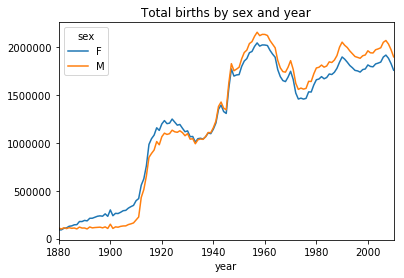

In [5]:
%pylab inline

total_births.plot(title='Total births by sex and year')

def add_prop(group):
    #整除法会向下圆整
    births = group.births.astype(float)
    
    group['prop'] = births/births.sum()
    return group
names = names.groupby(['year','sex']).apply(add_prop)

***
验证所有分组的prop的总和是否为1，由于这是一个浮点型数据，所以我们应该用np.allclose来检查这个分组总计值是否近似于1：

In [6]:
np.allclose(names.groupby(['year','sex']).prop.sum(),1)

True

***
为了进一步的分析，需要取出该数据的一个子集：每对sex/year组合的前1000个名字。这又是一个分组操作

In [8]:
def get_top1000(group):
    return group.sort_values(by='births',ascending=False)[:1000]

grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)

top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011484
         15          Martha   F    1040  1880  0.011429
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     794  1880  0.008726
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2010 M   1677617       Yair   M     201  2010  0.000106
         1677616      Talan   M     201  2010  0.000106
         1677614      Keyon   M     201  2010  0.000106
         1677613       Kael   M     201  2010  0.000106
         1677618   Demarion   M     200  2010  0.000105
         1677619     Gibson   M     200  2010  0.000105
         1677620     Reagan   M     200  2010  0.000105
         1677621  Cristofer   M     199  2010  0.000105
         1677622     Daylen   M     199  2010  0.000105
         1677623     Jordon   M     199  2010  0.000105
         1677624    Dashawn   M     198  2010  0.000104
         1677625      Masen   M     198  2010  0.000104
         1677629      Rowen   M     197  2010  0.000104
         1677631     Yousef   M     197  2010  0.000104
         1677630   Thaddeus   M     197  2010  0.000104
         1677628      Kadin   M     197  2010  0.000104
         1677627     Dillan   M     197  2010  0.000104
         1677626   Clarence   M     197  2010  0.000104
         1677634      Slade   M     196  2010  0.000103
         1677632    Clinton   M     196  2010  0.000103
         1677633    Sheldon   M     196  2010  0.000103
         1677636    Keshawn   M     195  2010  0.000103
         1677637   Menachem   M     195  2010  0.000103
         1677635     Joziah   M     195  2010  0.000103
         1677638     Bailey   M     194  2010  0.000102
         1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

### 分析命名趋势

有了完整的数据集和刚才生成的投票1000数据集，我们就可以开始分析各种命名趋势了，首先将前1000个名字分为男女两个部分：

In [9]:
boys = top1000[top1000.sex == 'M']
girls =top1000[top1000.sex == 'F']

***
这是两个简单的时间序列，只需稍作整理即可绘制出相应的图表（比如每年叫做John和Mary的婴儿数）

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000295A19AA5C0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000295A1C337F0>], dtype=object)

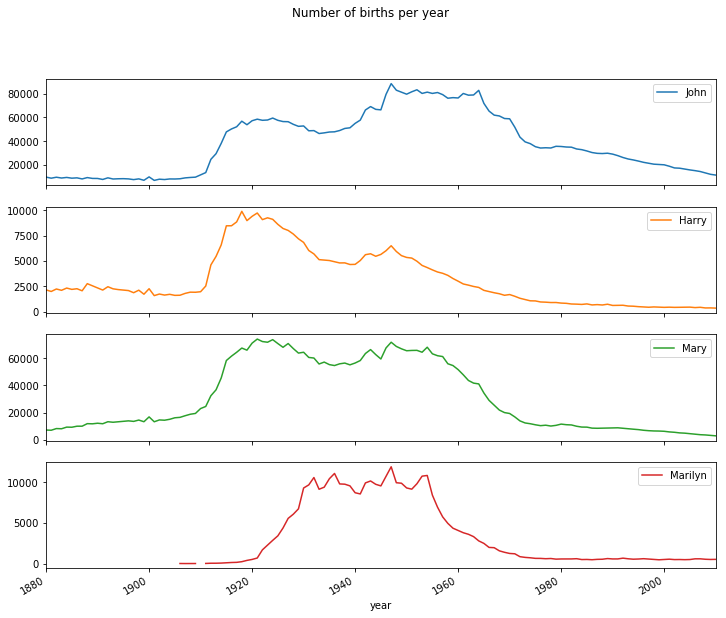

In [12]:
#我们先生成一张按year和name统计的总出生数透视表
total_births = top1000.pivot_table('births',index='year',columns='name',
                                  aggfunc=sum)

top1000.index.names = ['Year','Sex','Index']
#然后用DataFrame的plot方法绘制几个名字的曲线图
subset = total_births[['John','Harry','Mary','Marilyn']]

subset.plot(subplots=True,figsize=(12,10),grid=False,
           title="Number of births per year")

***
**评估命名多样性的增长**

上图所反映的降低情况可能意味着父母愿意给小孩起常见的名字的名字越来越少，这个假设可以从数据中得到验证。一个办法是计算最流行的1000个名字所占的比例，我按year和sex进行聚合并绘图

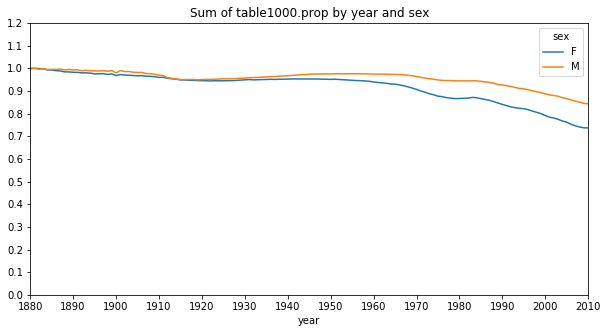

In [15]:
table = top1000.pivot_table('prop',index='year',
                           columns='sex',aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',figsize=(10,5),
          yticks=np.linspace(0,1.2,13),xticks=range(1880,2020,10))

*从图中可以看出名字的多样性确实是出现了增长（前1000项的比降低）*

***
另一个办法是计算占总出生人数前50%的不同名字的数量，这个数字不好计算。我们只考虑2010年男孩的名字：

In [16]:
df = boys[boys.year == 2010]

***
在对prop降序排列之后，我们想知道前面多少个名字的人数加起来才够50%。虽然编写一个for循环确实也能达到目的，但Numpy有一种更聪明的矢量方式。先计算prop的累计和cumsum，然后再通过searchsorted方法找出0.5应该被插入在哪个位置才能保证不破坏顺序：

In [17]:
prop_cumsum = df.sort_values(by='prop',ascending=False).prop.cumsum()
#由于数组是从0开始的，因此我们要给这个结果+1
prop_cumsum.searchsorted(0.5)+1

array([117], dtype=int64)

***
现在就可以对所有year/sex组合执行这个计算了。按这两个字段进行groupby处理，然后用一个函数计算各分组的这个值：

In [20]:
def get_quantile_count(group,q=0.5):
    group = group.sort_values(by='prop',ascending=False)
    return group.prop.cumsum().searchsorted(q)+1

diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

***
diversity这个DataFrame拥有两个时间序列（每个性别一个，按年度索引）

In [24]:
#diversity.plot(title="Number of popular names in top 50%")
diversity.head()

sex,F,M
year,,
1880,[38],[14]
1881,[38],[14]
1882,[38],[15]
1883,[39],[15]
1884,[39],[16]
